# data.csv

```
SELECT period.name, internship.type, skill_entry_with_workflow.id, skill_main.code, skill_descriptor.code, skill_situation_family.code ,skill_entry_with_workflow.workflow_state, skill_entry_with_workflow.created_at, skill_entry_with_workflow.updated_at
FROM skill_entry_with_workflow
LEFT JOIN skill_descriptor ON skill_entry_with_workflow.skill_descriptor_id = skill_descriptor.id
LEFT JOIN skill_main ON skill_descriptor.skill_main_id = skill_main.id
LEFT JOIN skill_container_with_situation_family ON skill_entry_with_workflow.skill_container_id = skill_container_with_situation_family.id
LEFT JOIN skill_situation_family ON skill_container_with_situation_family.situation_family_id = skill_situation_family.id
LEFT JOIN scoreboard_entry_abstract ON skill_container_with_situation_family.id = scoreboard_entry_abstract.skill_container_id
LEFT JOIN internship_assignment ON scoreboard_entry_abstract.internship_assignment_id = internship_assignment.id
LEFT JOIN period ON internship_assignment.period_id = period.id
LEFT JOIN internship ON internship_assignment.internship_id = internship.id

WHERE (period.name = "20222" OR period.name = "20231" OR period.name = "20232" OR period.name = "20241") AND internship.type = "internshipPractical"
```

In [2]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/data.csv')
display(data)

,name,type,id,code,code.1,code.2,workflow_state,created_at,updated_at
0,20232,internshipPractical,018fb9a9-679e-7a4a-b7aa-39c1aa113192,C1,C1NnD5,FS02,certified,2024-05-27 12:47:18,2024-07-01 11:38:05
1,20232,internshipPractical,018fb9a9-b74f-7747-b952-19298903556b,C3,C3NnD3,FS02,certified,2024-05-27 12:47:38,2024-07-01 11:38:30
2,20232,internshipPractical,018fb9ae-2e81-7832-b25a-224b59a31ad0,C1,C1NnD1,FS01,certified,2024-05-27 12:52:31,2024-07-01 11:38:47
3,20232,internshipPractical,018fb9ae-6869-76b8-a0cc-6b25e384dbf6,C1,C1NnD6,FS01,certified,2024-05-27 12:52:46,2024-07-01 11:38:59
4,20232,internshipPractical,018fc3ff-7f2e-7a8e-b760-aa27fd7cdb33,C1,C1NiD6,FS03,certified,2024-05-29 12:57:32,2024-07-01 11:39:37
...,...,...,...,...,...,...,...,...,...
81634,20231,internshipPractical,1ee7d757-ded1-66d2-81c2-c3fe946aa90b,C4,C4NcD3,FS02,in_progress,2023-11-07 14:56:47,2023-11-07 14:56:47
81635,20231,internshipPractical,1ee7d759-4478-6548-87da-032039870491,C5,C5NcD2,FS09,in_progress,2023-11-07 14:57:24,2023-11-07 14:57:24
81636,20231,internshipPractical,1ee7d75a-668d-6754-a53d-932a1d23546b,C5,C5NcD6,FS01,in_progress,2023-11-07 14:57:55,2023-11-07 14:57:55
81637,20231,internshipPractical,1ee7d75c-e927-6758-b419-bf1c633e8370,C3,C3NcD1,FS10,in_progress,2023-11-07 14:59:02,2023-11-07 14:59:02


In [5]:
# data_pt = pd.pivot_table(data, values="name", index=[data['id']], columns=data['record'], aggfunc="count", fill_value=0, dropna=False)


data_pt = pd.pivot_table(data, values="id", index=[data['code']], columns=data['code.2'], aggfunc="count")
display(data_pt)

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code,,,,,,,,,,,
C1,3497,3631,2588,2508,998,868,1337,553,1700,934,659
C2,2107,2110,1639,1274,672,570,924,307,1049,555,403
C3,2554,2193,1189,2131,1044,272,405,492,769,540,540
C4,1973,3507,3452,2144,796,284,512,266,905,457,411
C5,3594,3085,2373,1930,937,467,953,486,1211,718,534
C6,1278,1383,1074,1108,545,252,436,384,550,348,274


In [13]:
col_names = list(data_pt.columns)[0:]
row_names = list(data_pt.index)

In [16]:
X = data_pt[col_names].values 

In [18]:
row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

print("Profil ligne:")
display(pd.DataFrame(row_profile, index=row_names, columns=col_names))

Profil ligne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1,0.181446,0.188398,0.134281,0.130130,0.051782,0.045037,0.069372,0.028693,0.088206,0.048462,0.034193
C2,0.181481,0.181740,0.141171,0.109733,0.057881,0.049096,0.079587,0.026443,0.090353,0.047804,0.034711
C3,0.210570,0.180806,0.098030,0.175695,0.086075,0.022426,0.033391,0.040564,0.063402,0.044521,0.044521
C4,0.134154,0.238458,0.234718,0.145781,0.054124,0.019311,0.034813,0.018087,0.061535,0.031074,0.027946
C5,0.220653,0.189403,0.145690,0.118492,0.057527,0.028671,0.058509,0.029838,0.074349,0.044082,0.032785
C6,0.167453,0.181211,0.140723,0.145178,0.071410,0.033019,0.057128,0.050314,0.072065,0.045597,0.035901


In [19]:
col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

print("Profil colonne:")
display(pd.DataFrame(col_profile, index=row_names, columns=col_names))

Profil colonne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1,0.233087,0.228236,0.210150,0.226048,0.199920,0.319941,0.292752,0.222267,0.274903,0.262950,0.233605
C2,0.140439,0.132629,0.133090,0.114826,0.134615,0.210100,0.202321,0.123392,0.169631,0.156250,0.142857
C3,0.170233,0.137847,0.096549,0.192068,0.209135,0.100258,0.088680,0.197749,0.124353,0.152027,0.191421
C4,0.131507,0.220441,0.280309,0.193240,0.159455,0.104681,0.112109,0.106913,0.146345,0.128660,0.145693
C5,0.239552,0.193915,0.192692,0.173952,0.187700,0.172134,0.208671,0.195338,0.195828,0.202140,0.189295
C6,0.085183,0.086932,0.087211,0.099865,0.109175,0.092886,0.095467,0.154341,0.088939,0.097973,0.097129


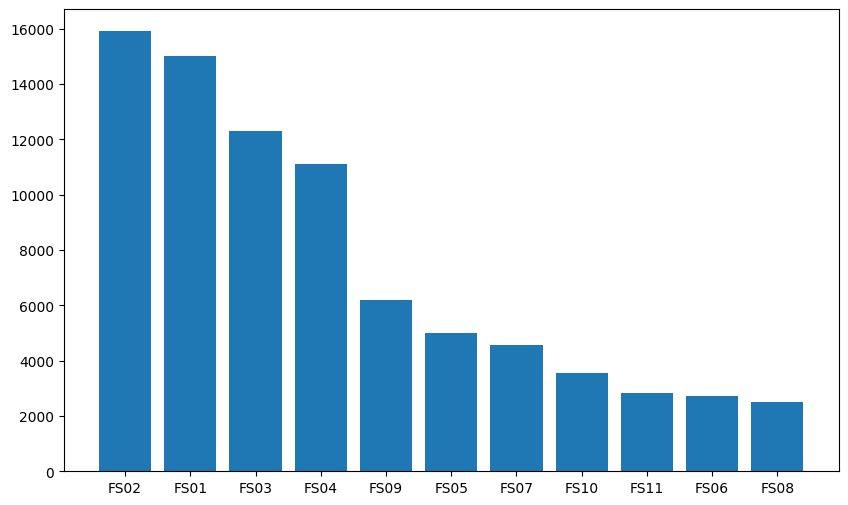

In [20]:
total_FS = data_pt[col_names].sum()

prop_FS = total_FS
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

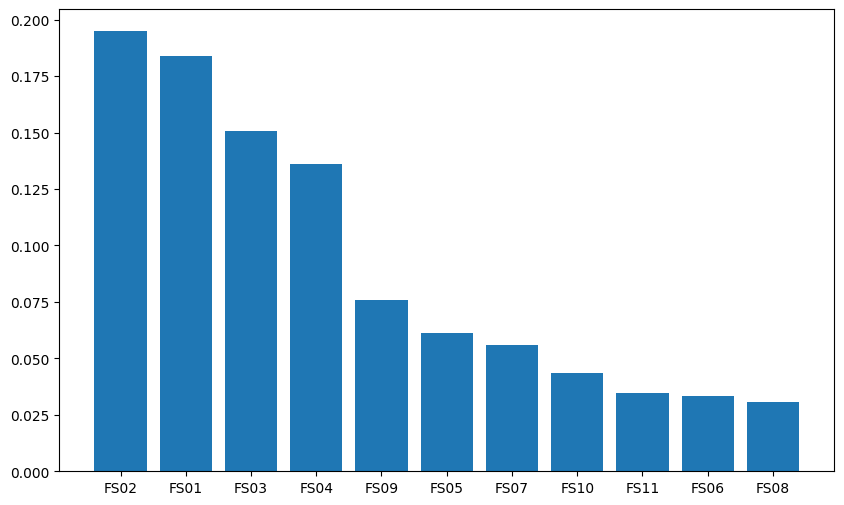

In [21]:
total_skill = data_pt[col_names].sum()

prop_FS = total_FS / total_FS.sum()
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

In [22]:
data_pt

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code,,,,,,,,,,,
C1,3497,3631,2588,2508,998,868,1337,553,1700,934,659
C2,2107,2110,1639,1274,672,570,924,307,1049,555,403
C3,2554,2193,1189,2131,1044,272,405,492,769,540,540
C4,1973,3507,3452,2144,796,284,512,266,905,457,411
C5,3594,3085,2373,1930,937,467,953,486,1211,718,534
C6,1278,1383,1074,1108,545,252,436,384,550,348,274


In [24]:
my_ca = CA(row_labels=data_pt.index.values, col_labels=data_pt.columns.values,stats=True)

In [26]:
my_ca.fit(data_pt.values)


CA(col_labels=array(['FS01', 'FS02', 'FS03', 'FS04', 'FS05', 'FS06', 'FS07', 'FS08',
       'FS09', 'FS10', 'FS11'], dtype=object),
   row_labels=array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype=object))

In [27]:
my_ca.eig_

array([[2.18803940e-02, 1.28282236e-02, 2.64096323e-03, 1.00832534e-03,
        2.76238723e-04],
       [5.66348604e+01, 3.32043678e+01, 6.83582680e+00, 2.60993312e+00,
        7.15011872e-01],
       [5.66348604e+01, 8.98392282e+01, 9.66750550e+01, 9.92849881e+01,
        1.00000000e+02]])

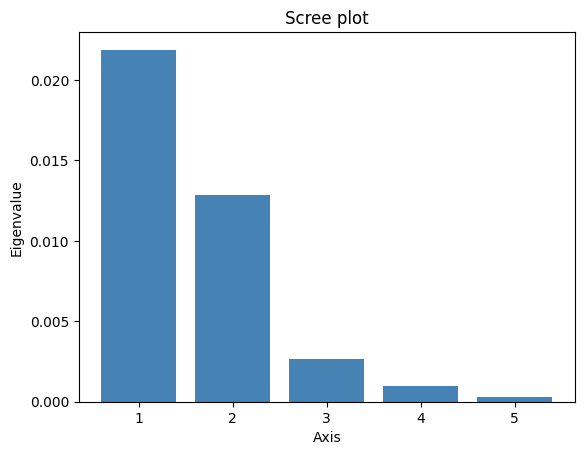

In [28]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues()

Premier axe factoriel


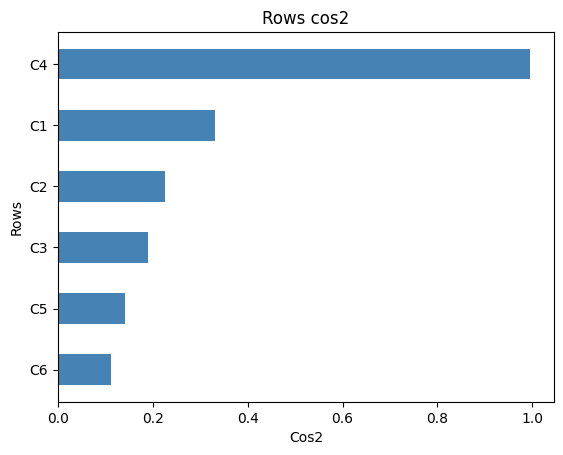

Second axe factoriel


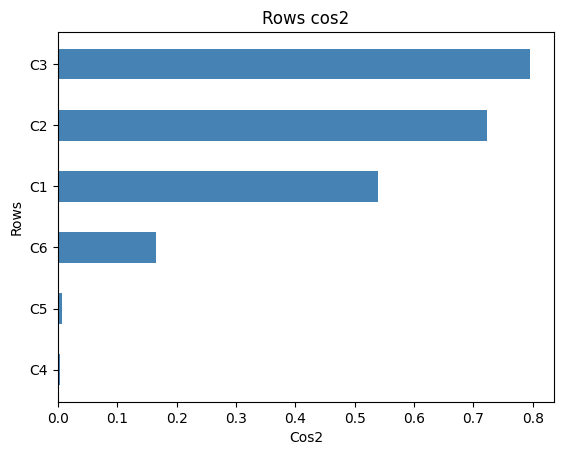

In [29]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2)

Premier axe factoriel


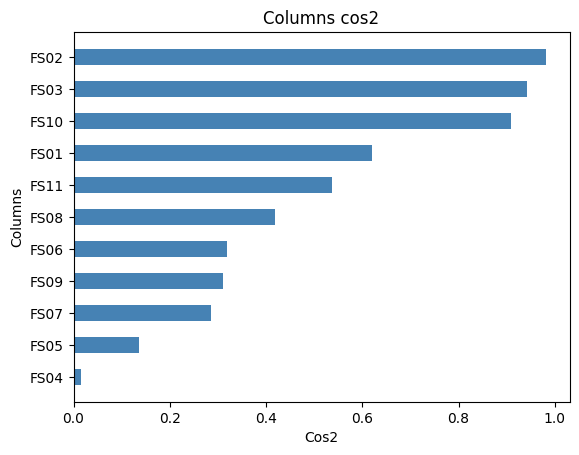

Second axe factoriel


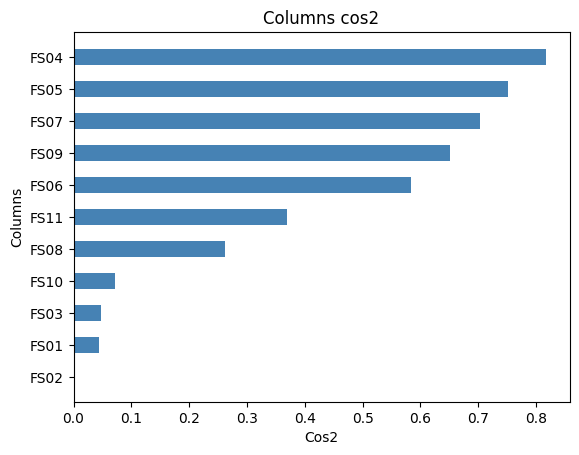

In [30]:
#### Profil colonne (les Candidats)

print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2)

Premier axe


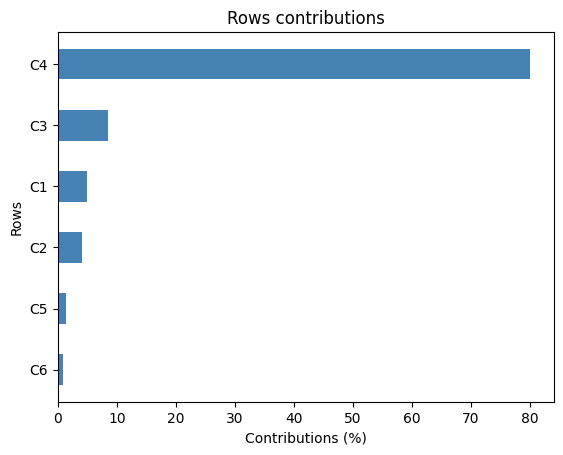

Second axe


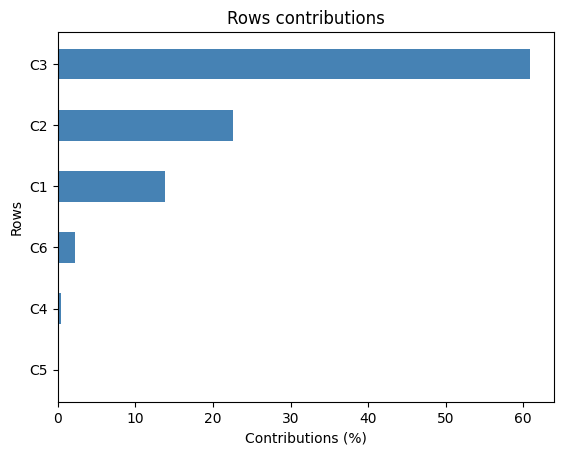

In [31]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_row_contrib(num_axis=1)
print("Second axe")
my_ca.plot_row_contrib(num_axis=2)

Premier axe


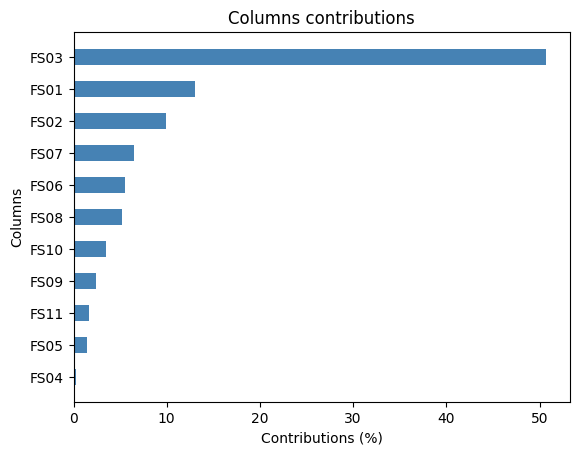

Second axe


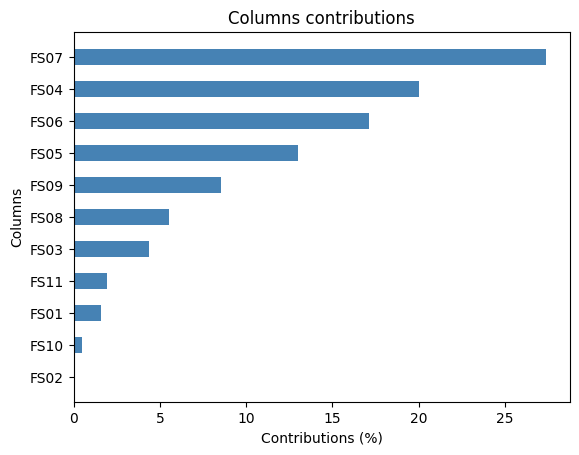

In [32]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_col_contrib(num_axis=1)
print("Second axe")
my_ca.plot_col_contrib(num_axis=2)

In [34]:
info_skill=my_ca.row_topandas()
info_skill

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_contrib_dim4,row_contrib_dim5,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5
C1,-0.067797,-0.086463,-0.026446,-0.026474,0.020241,4.959259,13.757557,6.251765,16.409631,35.014198,0.331103,0.538516,0.050380,0.050488,0.029513
C2,-0.079708,-0.142511,-0.017484,-0.002447,-0.033392,4.129385,22.514628,1.646011,0.084422,57.404409,0.226184,0.723024,0.010882,0.000213,0.039696
C3,-0.112131,0.229328,-0.008099,-0.027957,-0.008419,8.537378,60.908227,0.369010,11.516392,3.812123,0.190267,0.795840,0.000993,0.011828,0.001073
C4,0.311815,0.017622,-0.006523,-0.007015,-0.002246,80.050956,0.436076,0.290224,0.879161,0.328909,0.995828,0.003180,0.000436,0.000504,0.000052
C5,-0.039520,-0.008891,0.094379,0.022068,0.004669,1.424153,0.122935,67.291420,9.635846,1.574398,0.141254,0.007149,0.805583,0.044043,0.001971
C6,-0.045868,0.055696,-0.082601,0.081429,0.007425,0.898869,2.260577,24.151570,61.474548,1.865963,0.112417,0.165755,0.364577,0.354305,0.002946


In [35]:
info_FS=my_ca.col_topandas()
info_FS

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_contrib_dim5,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5
FS01,-0.124753,0.033584,0.091778,0.000838,0.003059,13.071484,1.615765,58.612967,0.012787,0.622391,0.619448,0.044892,0.335259,0.000028,0.000372
FS02,0.105353,-0.000182,0.004123,-0.012880,0.005190,9.885147,0.000050,0.125450,3.206063,1.900172,0.981443,0.000003,0.001503,0.014669,0.002382
FS03,0.271140,-0.061025,0.009488,0.025162,-0.005150,50.683839,4.379139,0.514194,9.471352,1.448189,0.942638,0.047750,0.001154,0.008118,0.000340
FS04,0.018829,0.137370,-0.051237,-0.032123,0.014673,0.220216,19.991577,13.509303,13.907863,10.592176,0.015350,0.816995,0.113658,0.044675,0.009321
FS05,-0.070574,0.165214,-0.032640,0.014002,-0.052964,1.391929,13.010764,2.466760,1.188940,62.093516,0.137049,0.751056,0.029315,0.005395,0.077185
FS06,-0.189979,-0.257146,-0.098380,-0.036508,-0.007549,5.481627,17.129472,12.178786,4.392580,0.685583,0.318597,0.583698,0.085437,0.011765,0.000503
FS07,-0.159454,-0.250489,-0.017909,0.027324,-0.008755,6.500560,27.361847,0.679385,4.142047,1.552163,0.284676,0.702516,0.003591,0.008359,0.000858
FS08,-0.192942,0.152659,-0.090429,0.138996,0.031991,5.185054,5.536440,9.436444,58.392602,11.291079,0.418033,0.261697,0.091827,0.216950,0.011493
FS09,-0.083074,-0.120377,-0.020663,-0.019914,0.005964,2.389160,8.556383,1.224627,2.978984,0.975309,0.310157,0.651234,0.019189,0.017822,0.001598
FS10,-0.133132,-0.037187,-0.015005,-0.001823,0.012473,3.524382,0.469021,0.370930,0.014343,2.450229,0.909347,0.070950,0.011552,0.000171,0.007981


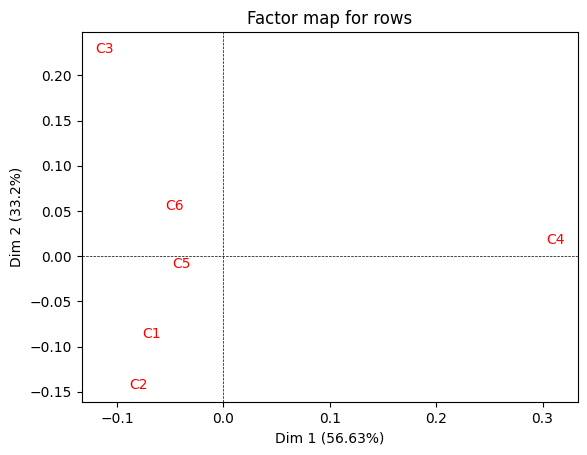

In [ ]:
# Graphique des compétences (en ligne)
my_ca.mapping_row(num_x_axis=1,num_y_axis=2)

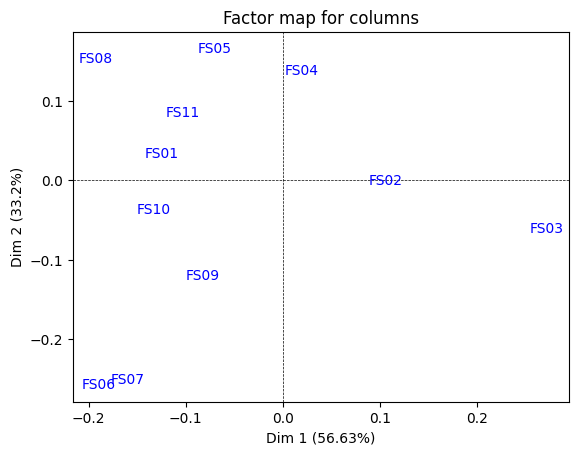

In [37]:
# Graphique des familles de situation (en colonne)
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)

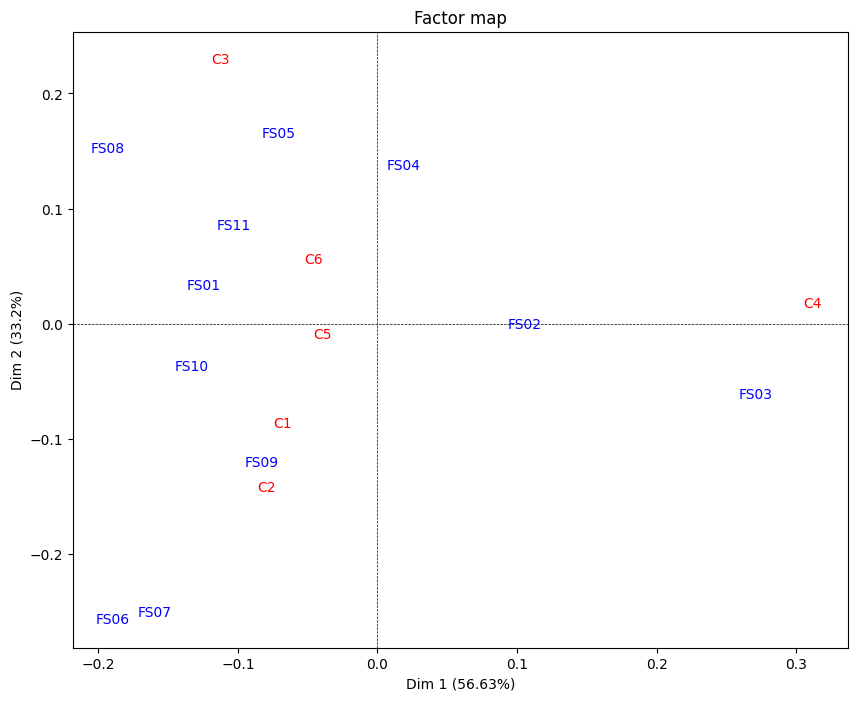

In [38]:
# Graphique profil ligne profil colonne

my_ca.mapping(1, 2, figsize=(10, 8))